In [ ]:

!pip install tika
!git clone https://github.com/nitesh251/ResumeRanking.git
!pip install nltk
!pip install gensim
!pip install wordcloud
!pip install jupyterthemes
!pip install xlsxwriter
!pip install openpyxl
!pip install pdfplumber

In [ ]:
#resume_path='/content/ResumeRanking/resume21aug/'
resume_path='/content/ResumeRanking/resumetest/'

In [ ]:
#!git clone https://github.com/GitTanmai/Tanmai-practice.git

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import pdfplumber
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
# metrics are used to find accuracy or error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier  
from sklearn.feature_extraction.text import CountVectorizer

# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from scipy.stats import sem
from tika import parser
# Get additional stopwords from nltk
from nltk.corpus import stopwords
import os
import xlsxwriter
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
from statistics import mean
#Function to read resumes from the folder one by one
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#mypath_r='/content/ResumeRanking/javareject' #enter your path here where you saved the resumes
mypath_r='/content/ResumeRanking/Python Screen reject/Python Screen reject'
onlyfiles_r = [os.path.join(mypath_r, f) for f in os.listdir(mypath_r) if os.path.isfile(os.path.join(mypath_r, f))]
print(onlyfiles_r)
#mypath_s='/content/ResumeRanking/javaselect' #enter your path here where you saved the resumes
mypath_s='/content/ResumeRanking/Python screen selects/Python screen selects'
onlyfiles_s = [os.path.join(mypath_s, f) for f in os.listdir(mypath_s) if os.path.isfile(os.path.join(mypath_s, f))]

['/content/ResumeRanking/Python Screen reject/Python Screen reject/AnkitJaiswal.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/Sankalp.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/AjaypalYadav.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/MohanRaghuDachepalli[4_3].pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/shikhasartan_4.4 Years_Gurgaon.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/ParasSoni.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/Ashwin-Python.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/Abiral_Pandey_Fullstack_Java.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/Sanjay_Soni_Python Engineer_ITC Infotech.pdf', '/content/ResumeRanking/Python Screen reject/Python Screen reject/Diksha Kumari_Tata Consultancy Services_Talent Toppers.pdf', '/content/ResumeRanking/Python Screen r

In [ ]:
#rejected data into dataframe

reject=[]
for i in range(0, len(onlyfiles_r)):
    file = onlyfiles_r[i]
    if 'pdf' in file:
      #print(file)
      parsed_pdf = parser.from_file(file)
      data = parsed_pdf['content'] 
      safe_text = data.replace("\n", "").replace("\\", "")
      #print(safe_text)
      reject.append(safe_text)
df_reject = pd.DataFrame(reject, columns = ['resume_text' ])
df_reject['class']='rejected'
df_reject.head(1)

2021-10-22 06:23:25,685 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2021-10-22 06:23:30,480 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2021-10-22 06:23:31,722 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


,resume_text,class
0,Ankit Jaiswal Resume/ www.enhancv.com Powered ...,rejected


In [ ]:
#selected data into dataframe
select=[]
for i in range(0, len(onlyfiles_s)):
    file = onlyfiles_s[i]
    if 'pdf' in file:
      #print(file)
      parsed_pdf = parser.from_file(file)
      data = parsed_pdf['content'] 
      safe_text = data.replace("\n", "").replace("\\", "")
      #print(safe_text)
      select.append(safe_text)
df_select = pd.DataFrame(select, columns = ['resume_text' ])
df_select['class']='selected'
df_select.head(1)


,resume_text,class
0,SHRUTI JOSHI Data Analyst | Python Developer |...,selected


In [ ]:
#merging selected and rejected data
resume_df=df_reject.append(df_select, ignore_index=True) 


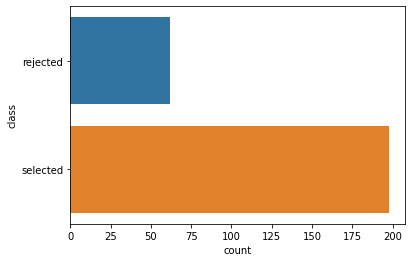

In [ ]:
sns.countplot(y=resume_df['class'],label='count_plot')

In [ ]:
pd.options.display.max_colwidth = 1000

In [ ]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  260 non-null    object
 1   class        260 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [ ]:
resume_df['class'].value_counts()

selected    198
rejected     62
Name: class, dtype: int64

In [ ]:
#encoding of class column into 0(rejected) and 1(selected)
resume_df['class']=resume_df['class'].apply(lambda x:1 if x=='selected' else 0)


In [ ]:

stop_words=stopwords.words('english')
print(stop_words)
stop_words.extend(['from','subject','re','gmail','com','Mobile','Email'])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
###########################################################
# Cleaned text
#removing extra characters like bullets
###########################################################

In [ ]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [ ]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


In [ ]:
re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

re.compile(r'[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿─-⯯✂-➰✂-➰Ⓜ-🉑🤦-🤷𐀀-\U0010ffff♀-♂☀-⭕\u200d⏏⏩⌚️〰]+',
re.UNICODE)

In [ ]:
import string
def remove_punct(headline_text):
    table=str.maketrans('','',string.punctuation)
    return headline_text.translate(table)

In [ ]:
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

In [ ]:

resume_df['resume_text']=resume_df['resume_text'].apply(lambda x: x.replace('\r',''))
resume_df['cleaned']=resume_df['resume_text'].apply(preprocess)
resume_df['cleaned'] = resume_df['cleaned'].apply(remove_emojis)
resume_df['cleaned'] = resume_df['cleaned'].apply(remove_punct)
resume_df['cleaned'] = resume_df['cleaned'].apply(remove_numbers)

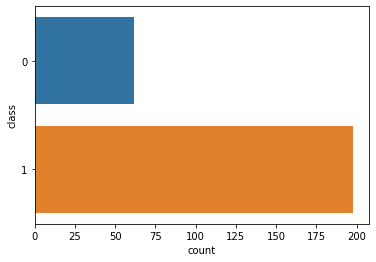

In [ ]:
# Plot the counts of flagged vs not flagged
sns.countplot(y=resume_df['class'],label='count_plot')

In [ ]:
# plot the word cloud for text that is flagged
#plt.figure(figsize = (20,20)) 
#wc=WordCloud(max_words=2000,width=1000,height=200,stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].
#cleaned))
#plt.axis("off")
#plt.imshow(wc)

In [ ]:
#plt.figure(figsize = (20,20)) 
#wc=WordCloud(max_words=2000,width=1000,height=200,stopwords=stop_words).generate(str(resume_df[resume_df['class']==0].
#cleaned))
#plt.axis("off")
#plt.imshow(wc)

In [ ]:
#================================================================
#Applying Naive Bayes Model
#================================================================

In [ ]:

# split data
X_train, X_test, y_train, y_test = train_test_split(resume_df['cleaned'], resume_df['class'],
                                                    test_size=0.30, random_state=55) 
# fit vocabulary and extract word count features
cv = CountVectorizer()
X_traincv = cv.fit_transform(X_train)  
X_testcv = cv.transform(X_test)

# learn and predict using MultinomialNB
clfNB = MultinomialNB(alpha=0.1)
clfNB.fit(X_traincv, y_train)

# so far so good, but when I predict on X_testcv
y_pred = clfNB.predict(X_testcv) 
ml=metrics.accuracy_score(y_test, y_pred)
y_predict_train = clfNB.predict(X_traincv)
print("Training ACCURACY OF THE Naive Bayes MODEL: ", metrics.accuracy_score(y_train, y_predict_train))
print("ACCURACY OF THE Naive Bayes MODEL: ", metrics.accuracy_score(y_test, y_pred))

Training ACCURACY OF THE Naive Bayes MODEL:  1.0
ACCURACY OF THE Naive Bayes MODEL:  0.8461538461538461


In [ ]:
X_test

95     shekhar kashyap address ram nagar sector gurugram india shekhar smk experience tata consultancy service gurgaon haryana november present working experience banking financial domain leading bank lloyd banking group working experience expertise hadoop ecosystems hdfs hive spark sqoop scalability distributed computing high performance computing experience languages java python sql working experience service oriented architecture platform soa datapower build soap https rest json based applications ibm data power hands experience working tools like pyspark eclipse sqoop hive service tool git github ucd urban code deployment devops pipeline continuous integration continuous deployment google cloud certified professional data engineer year microsoft azure certified year projects pyspark data analysis lloyds bank term deposit data analysis etl spark loaded data sqoop hdfs created spark dataframe transform spark sql extract following insights marketing success rate failure rate ranking m

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
y_test

95     1
233    1
201    1
241    1
194    1
      ..
47     0
159    1
25     0
63     1
151    1
Name: class, Length: 78, dtype: int64

In [ ]:
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred, average='binary')


0.9090909090909091

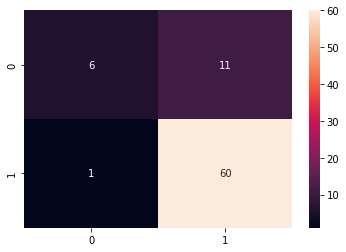

In [ ]:
#confusion matrix on Naive Bayes test data
#training data model
#y_predict_train = NB_classifier.predict(X_train)
NBcm = confusion_matrix(y_test, y_pred)
sns.heatmap(NBcm, annot = True)

In [ ]:
#================================================================
#Applying RandomForestClassifier
#================================================================

In [ ]:
#Random Forest
clf1 = RandomForestClassifier(n_estimators = 1000,random_state=1)  

  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf1.fit(X_traincv, y_train)
  
# performing predictions on the test dataset
y_pred1 = clf1.predict(X_testcv)
  
# metrics are used to find accuracy or error
from sklearn import metrics  

# using metrics module for accuracy calculation
y_predict_train1 = clf1.predict(X_traincv)
print("Training ACCURACY OF THE RF MODEL: ", metrics.accuracy_score(y_train, y_predict_train1))
print("ACCURACY OF THE Random Forest MODEL: ", metrics.accuracy_score(y_test, y_pred1))
rl=metrics.accuracy_score(y_test, y_pred1)

Training ACCURACY OF THE RF MODEL:  1.0
ACCURACY OF THE Random Forest MODEL:  0.782051282051282


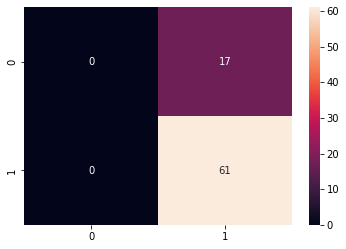

In [ ]:
RFcm = confusion_matrix(y_test, y_pred1)
sns.heatmap(RFcm, annot = True)

In [ ]:
#================================================================
#Applying SVM
#================================================================

In [ ]:
#SVM
from sklearn import svm
svclf = svm.SVC(random_state=1)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
svclf.fit(X_traincv, y_train)
  
# performing predictions on the test dataset
y_pred2 = svclf.predict(X_testcv)
  
# metrics are used to find accuracy or error
from sklearn import metrics  

# using metrics module for accuracy calculation
print("ACCURACY OF THE SVM MODEL: ", metrics.accuracy_score(y_test, y_pred2))

ACCURACY OF THE SVM MODEL:  0.782051282051282


In [ ]:
svclf.score(X_traincv, y_train)

0.8571428571428571

In [ ]:
svclf.score(X_testcv, y_test)

0.782051282051282

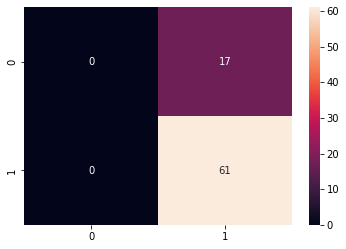

In [ ]:
#confusion matrix on NB
#training data model
#y_predict_train = NB_classifier.predict(X_train)

RFcm = confusion_matrix(y_test, y_pred2)
sns.heatmap(RFcm, annot = True)

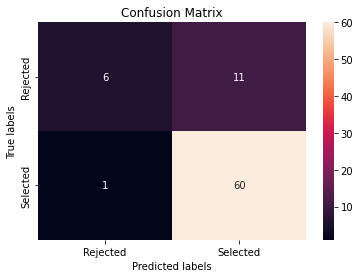

In [ ]:
  

ax= plt.subplot()
sns.heatmap(NBcm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Rejected', 'Selected']); ax.yaxis.set_ticklabels(['Rejected', 'Selected']);

ax.figure.savefig("ConfusionMatrix.png")

In [ ]:
#====================================RESUME PREDICTION

In [ ]:
#=====================================

In [ ]:
#mypath='/content/ResumeRanking/MLRESUME/' #enter your path here where you saved the resumes
mypath=resume_path
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
print(onlyfiles)
reject=[]
for i in range(0, len(onlyfiles)):
    file = onlyfiles[i]
    if 'pdf' in file:
      #print(file)
      parsed_pdf = parser.from_file(file)
      data = parsed_pdf['content'] 
      safe_text = data.replace("\n", "").replace("\\", "")
      #print(safe_text)
      reject.append(safe_text)
predict_df = pd.DataFrame(reject, columns = ['resume_text' ])
#resume_df.head(2)

['/content/ResumeRanking/resumetest/Mayank Rajput.pdf', '/content/ResumeRanking/resumetest/SumitPawar.pdf', '/content/ResumeRanking/resumetest/RAJAT PALIWAL.pdf']


In [ ]:
predict_df['resume_text']=predict_df['resume_text'].apply(lambda x: x.replace('\r',''))

In [ ]:
# Cleaned text
predict_df['cleaned']=predict_df['resume_text'].apply(preprocess)
predict_df['cleaned'] = predict_df['cleaned'].apply(remove_emojis)
predict_df['cleaned'] = predict_df['cleaned'].apply(remove_punct)
predict_df['cleaned'] = predict_df['cleaned'].apply(remove_numbers)
#predict_df['cleaned']

In [ ]:
#=====================Naive Baiyes
X_testcv1 = cv.transform(predict_df['cleaned'])
clfNB.predict(X_testcv1)

array([1, 1, 1])

In [ ]:
#======================Random Forest
clf1.predict(X_testcv1)

array([1, 1, 1])

In [ ]:
#======================SVM
svclf.predict(X_testcv1)

array([1, 1, 1])

In [ ]:
#====================For Ranking

In [ ]:
rfprediction=clfNB.predict(X_testcv1)
print(onlyfiles,rfprediction)

outputdf=pd.DataFrame(list(zip(onlyfiles, rfprediction)),
               columns =['Name', 'Class'])
outputdf

['/content/ResumeRanking/resumetest/Mayank Rajput.pdf', '/content/ResumeRanking/resumetest/SumitPawar.pdf', '/content/ResumeRanking/resumetest/RAJAT PALIWAL.pdf'] [1 1 1]


,Name,Class
0,/content/ResumeRanking/resumetest/Mayank Rajput.pdf,1
1,/content/ResumeRanking/resumetest/SumitPawar.pdf,1
2,/content/ResumeRanking/resumetest/RAJAT PALIWAL.pdf,1


In [ ]:
rjoutputdf=pd.DataFrame()
rjoutputdf=outputdf[outputdf['Class']==0]
rjoutputdf['UserName']=rjoutputdf["Name"].str.split("/").str[4].str.split("_").str[0]
rjoutputdf.drop('Name', axis=1, inplace=True)
rjoutputdf.drop('Class', axis=1, inplace=True)
rjoutputdf['Class']='To Be Reviewed'
rjoutputdf

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,UserName,Class


In [ ]:
outputdf['Class']=outputdf['Class'].apply(lambda x:'Selected' if x==1 else 'Rejected')
summarydf=outputdf['Class'].groupby([outputdf['Class']]).count()

outputdf = outputdf[outputdf['Class']=='Selected']
outputrejecteddf = outputdf[outputdf['Class']=='Rejected']
summarydf

Class
Selected    3
Name: Class, dtype: int64

In [ ]:
outputdf

,Name,Class
0,/content/ResumeRanking/resumetest/Mayank Rajput.pdf,Selected
1,/content/ResumeRanking/resumetest/SumitPawar.pdf,Selected
2,/content/ResumeRanking/resumetest/RAJAT PALIWAL.pdf,Selected


In [ ]:
#outputdf.to_csv('/content/ResumeRanking/MLSelected.csv')

In [ ]:
#=================================================RANKING NLP=======================

In [ ]:
#==================================================

In [ ]:
def pdfextract(file):
    '''
    raw = parser.from_file(file)
    raw = str(raw)

    safe_text = raw.encode('utf-8', errors='ignore')

    safe_text = str(safe_text).replace("\n", "").replace("\\", "")
    #print('--- safe text ---' )
    #print( safe_text )
    ''' 
    safe_text_arr=''
    with pdfplumber.open(file) as pdf:
      #print(pdf.pages[0])
      #first_page = pdf.pages[0]
      pageno=pdf.pages
      print(pageno)
      for i,pg in enumerate(pageno):
          safe_text = pageno[i].extract_text()
          #print(safe_text)
          safe_text_arr += ' ' + safe_text 

    print(len(safe_text_arr),pageno)

    return safe_text_arr
  

#functio n to read resume ends

In [ ]:
#function that does phrase matching and builds a candidate profile
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()
    #below is the csv where we have all the keywords, you can customize your own
    keyword_dict = pd.read_csv('/content/ResumeRanking/JD_weightage.csv')
    
    stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
    NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text) for text in keyword_dict['Machine learning'].dropna(axis = 0)]
    DL_words = [nlp(text) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
    python_words = [nlp(text) for text in keyword_dict['Python language'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]
    java_words = [nlp(text) for text in keyword_dict['Java'].dropna(axis = 0)]
    print(java_words)
    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DeepLearning', None, *DL_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DataEngineering', None, *Data_Engineering_words)
    matcher.add('Java', None, *java_words)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
  
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)
        
#function ends

In [ ]:
#code to execute/call the above functions

final_database=pd.DataFrame()
onlyfiles=list(outputdf['Name'])
for i in range(0, len(onlyfiles)):
    file = onlyfiles[i]
    if 'pdf' in file:
      print('fffffffffffffffffffffffffffffffffffffffffffff',file)
      dat = create_profile(file)
      final_database = final_database.append(dat)
      
print(final_database)

fffffffffffffffffffffffffffffffffffffffffffff /content/ResumeRanking/resumetest/Mayank Rajput.pdf
[<Page:1>]
2856 [<Page:1>]
[java, j2EE, spring, spring boot, hibernate, jSP, struts, sOA, rESTful aPI, oracle, mySql, docker, kubernetes, cI/CD, kubernetes, bit bucket, jenkins, HTML, javaScript, angular JS, react, agile]
fffffffffffffffffffffffffffffffffffffffffffff /content/ResumeRanking/resumetest/SumitPawar.pdf
[<Page:1>, <Page:2>, <Page:3>, <Page:4>, <Page:5>, <Page:6>, <Page:7>]
12764 [<Page:1>, <Page:2>, <Page:3>, <Page:4>, <Page:5>, <Page:6>, <Page:7>]
[java, j2EE, spring, spring boot, hibernate, jSP, struts, sOA, rESTful aPI, oracle, mySql, docker, kubernetes, cI/CD, kubernetes, bit bucket, jenkins, HTML, javaScript, angular JS, react, agile]
fffffffffffffffffffffffffffffffffffffffffffff /content/ResumeRanking/resumetest/RAJAT PALIWAL.pdf
[<Page:1>, <Page:2>]
4367 [<Page:1>, <Page:2>]
[java, j2EE, spring, spring boot, hibernate, jSP, struts, sOA, rESTful aPI, oracle, mySql, docker

In [ ]:
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'],final_database['Subject']]).count().unstack()

final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
new_data

Subject,DataEngineering,Java,Python
Candidate Name,,,
mayank rajput,2.0,2.0,6.0
rajat paliwal,5.0,0.0,4.0
sumitpawar,5.0,2.0,4.0


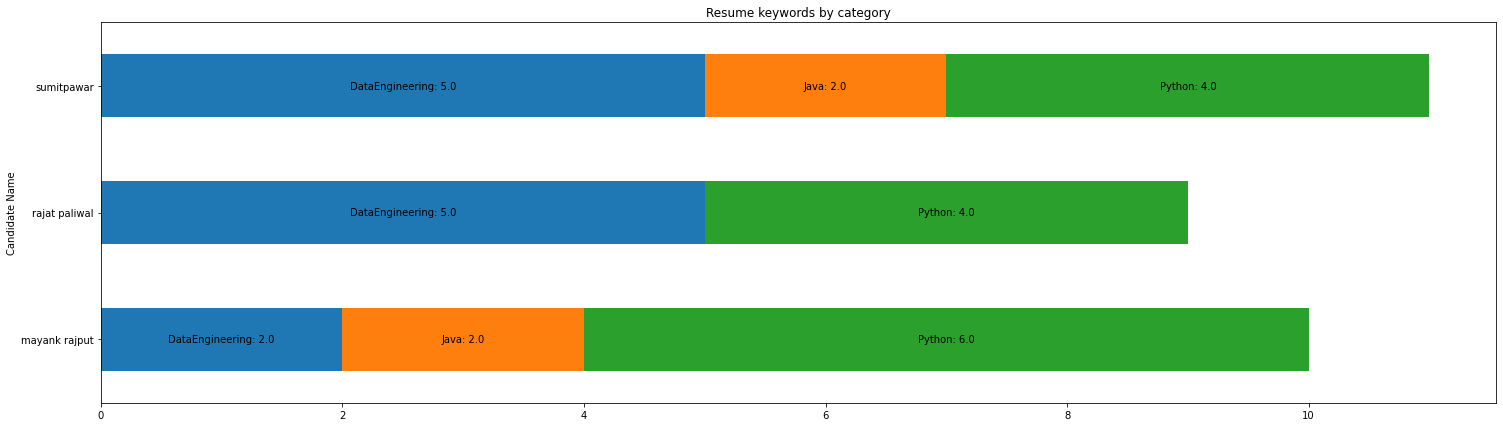

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
#plt.savefig('python_pretty_plot.png')
plt.show()
#pic.savefig('python_pretty_plot1.png')


In [ ]:
#!pip install excel2img

In [ ]:
#Generate df with weightage and technology


df = pd.read_csv('/content/ResumeRanking/JD_weightage.csv')

#ndf=df.iloc[:, 0:2].append(df.iloc[:, 2:4], ignore_index = True)
col1=list(df.iloc[:,0])+ list(df.iloc[:,2]) + list(df.iloc[:,4])+ list(df.iloc[:,6])+list(df.iloc[:,8])+ list(df.iloc[:,10])
col2=list(df.iloc[:,1])+ list(df.iloc[:,3]) + list(df.iloc[:,5])+ list(df.iloc[:,7])+list(df.iloc[:,9])+ list(df.iloc[:,11])
tabledf=pd.DataFrame(list(zip(col1, col2)),columns =['Keyword', 'WeightageScore'])
tabledf.dropna(axis=0, how='all',inplace=True)
#tabledf.head(5)
#df.head(20)

In [ ]:
final_database.Keyword = final_database.Keyword.str.rstrip()

In [ ]:
prepdf=final_database.merge( tabledf, on='Keyword', how='left')
prepdf.head(19)

,Candidate Name,Subject,Keyword,Count,WeightageScore
0,mayank rajput,Python,python,5,2.0
1,mayank rajput,Java,agile,1,NaN
2,mayank rajput,DataEngineering,hive,2,2.0
3,mayank rajput,DataEngineering,hive,2,5.0
4,mayank rajput,Python,hive,2,2.0
5,mayank rajput,Python,hive,2,5.0
6,mayank rajput,DataEngineering,sql,2,5.0
7,mayank rajput,DataEngineering,sql,2,5.0
8,mayank rajput,Python,sql,2,5.0
9,mayank rajput,Python,sql,2,5.0


In [ ]:
#Preparing graph for all subjects
prepdf_all=prepdf.groupby(by=['Candidate Name','Subject'],sort=False).sum()
prepdf_all

WeightageScore
Candidate Name Subject                        
mayank rajput  Python                     28.0
               Java                        0.0
               DataEngineering            17.0
sumitpawar     DataEngineering            39.0
               Python                     26.0
               Java                        0.0
rajat paliwal  DataEngineering            57.0
               Python                     44.0

In [ ]:
#Saving fig for all subjects
#prepdf_all.unstack().plot(kind='barh',figsize=(15, 15),legend=True).get_figure().savefig('output.png')

In [ ]:
prepdf = prepdf[~prepdf['Count'].isnull()]
# final conversion now worked
prepdf[['Count']] = prepdf[['Count']].astype(int)


In [ ]:
#prepdf['Count']=prepdf['Count'].astype(int)
prepdf

,Candidate Name,Subject,Keyword,Count,WeightageScore
0,mayank rajput,Python,python,5,2.0
1,mayank rajput,Java,agile,1,NaN
2,mayank rajput,DataEngineering,hive,2,2.0
3,mayank rajput,DataEngineering,hive,2,5.0
4,mayank rajput,Python,hive,2,2.0
5,mayank rajput,Python,hive,2,5.0
6,mayank rajput,DataEngineering,sql,2,5.0
7,mayank rajput,DataEngineering,sql,2,5.0
8,mayank rajput,Python,sql,2,5.0
9,mayank rajput,Python,sql,2,5.0


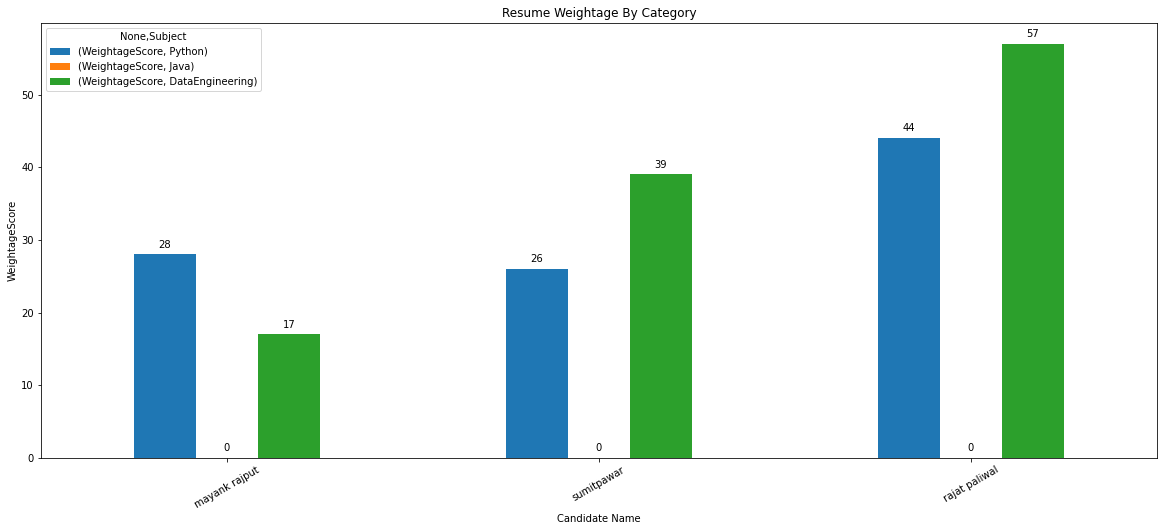

In [ ]:
df2=prepdf[['Candidate Name','Subject','WeightageScore']].groupby(by=['Candidate Name','Subject'],sort=False).sum().unstack()
# plot with annotations is probably easier
p1 = df2.plot.bar(figsize=(20, 8), ylabel='WeightageScore', title="Resume Weightage By Category")
p1.set_xticklabels(p1.get_xticklabels(), rotation=30)


for p in p1.patches:
    p1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width() / 2.,
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
        textcoords = 'offset points')

p1.figure.savefig('python_pretty_plot.png')

In [ ]:
prepdf

,Candidate Name,Subject,Keyword,Count,WeightageScore
0,mayank rajput,Python,python,5,2.0
1,mayank rajput,Java,agile,1,NaN
2,mayank rajput,DataEngineering,hive,2,2.0
3,mayank rajput,DataEngineering,hive,2,5.0
4,mayank rajput,Python,hive,2,2.0
5,mayank rajput,Python,hive,2,5.0
6,mayank rajput,DataEngineering,sql,2,5.0
7,mayank rajput,DataEngineering,sql,2,5.0
8,mayank rajput,Python,sql,2,5.0
9,mayank rajput,Python,sql,2,5.0


In [ ]:
prepdf['Candidate Name'].drop_duplicates().values

array(['mayank rajput', 'sumitpawar', 'rajat paliwal'], dtype=object)

In [ ]:
#prepdf['MScore']=prepdf.Count * prepdf.Weightage
#prepdf['NormalizeWeightage']=prepdf.Weightage/100
prepdf

def subjectwisedata(subvar):

  prepdf_subject=prepdf[prepdf['Subject']==subvar]
  prepdf_subject=prepdf_subject.groupby(by=['Candidate Name'],sort=False).sum()
  #prepdf_subject['class']=prepdf_subject['WeightageScore'].apply(lambda x: 1 if x>50 else 0)
  return prepdf_subject


pythondf=subjectwisedata('Python')
pythondf.columns=['Python_Count','Python_WeightageScore']


dedf=subjectwisedata('DataEngineering')
dedf.columns=['DataEngineering_Count','DataEngineering_WeightageScore']


mldf=subjectwisedata('ML')
mldf.columns=['ML_Count','ML_WeightageScore']

statsdf=subjectwisedata('Stats')
statsdf.columns=['Stats_Count','Stats_WeightageScore']

nlpdf=subjectwisedata('NLP')
nlpdf.columns=['NLP_Count','NLP_WeightageScore']

dldf=subjectwisedata('DeepLearning')
dldf.columns=['DeepLearning_Count','DeepLearning_WeightageScore']

javadf=subjectwisedata('Java')
javadf.columns=['Java_Count','Java_WeightageScore']

newdf=pythondf.join(dedf)
newdf=newdf.join(mldf)
newdf=newdf.join(statsdf)
newdf=newdf.join(nlpdf)
newdf=newdf.join(dldf)
newdf=newdf.join(javadf)
newdf['Name']=final_database['Candidate Name'].drop_duplicates().values
newdf.index

Index(['mayank rajput', 'sumitpawar', 'rajat paliwal'], dtype='object', name='Candidate Name')

In [ ]:
newdf

,Python_Count,Python_WeightageScore,DataEngineering_Count,DataEngineering_WeightageScore,ML_Count,ML_WeightageScore,Stats_Count,Stats_WeightageScore,NLP_Count,NLP_WeightageScore,DeepLearning_Count,DeepLearning_WeightageScore,Java_Count,Java_WeightageScore,Name
Candidate Name,,,,,,,,,,,,,,,
mayank rajput,16,28.0,8,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,mayank rajput
sumitpawar,49,26.0,62,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,sumitpawar
rajat paliwal,14,44.0,16,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rajat paliwal


In [ ]:
outputdf

,Name,Class
0,/content/ResumeRanking/resumetest/Mayank Rajput.pdf,Selected
1,/content/ResumeRanking/resumetest/SumitPawar.pdf,Selected
2,/content/ResumeRanking/resumetest/RAJAT PALIWAL.pdf,Selected


In [ ]:
final_database['Candidate Name'].drop_duplicates().values

array(['mayank rajput', 'sumitpawar', 'rajat paliwal'], dtype=object)

In [ ]:
outputdf.drop('Name', axis=1, inplace=True)
outputdf['Name']=final_database['Candidate Name'].drop_duplicates().values
outputdf=outputdf.merge(newdf)

outputdf=outputdf[['Name','Class', 'Python_WeightageScore',
        'DataEngineering_WeightageScore',
       'ML_WeightageScore', 
       'DeepLearning_WeightageScore',
       ]]

outputdf


,Name,Class,Python_WeightageScore,DataEngineering_WeightageScore,ML_WeightageScore,DeepLearning_WeightageScore
0,mayank rajput,Selected,28.0,17.0,NaN,NaN
1,sumitpawar,Selected,26.0,39.0,NaN,NaN
2,rajat paliwal,Selected,44.0,57.0,NaN,NaN


In [ ]:
#
#cm = confusion_matrix(y_test, y_predict_test)
#ConfusionMatrix=sns.heatmap(RFcm, annot = True)
#ConfusionMatrix.figure.savefig("ConfusionMatrix.png")

In [ ]:
noutputdf=outputdf[outputdf['Class']=='Selected']
noutputdf=noutputdf.fillna('NA')
noutputdf.reset_index(drop=True)

,Name,Class,Python_WeightageScore,DataEngineering_WeightageScore,ML_WeightageScore,DeepLearning_WeightageScore
0,mayank rajput,Selected,28.0,17.0,NA,NA
1,sumitpawar,Selected,26.0,39.0,NA,NA
2,rajat paliwal,Selected,44.0,57.0,NA,NA


In [ ]:


# writer = pd.ExcelWriter('/content/ResumeRanking/MLFinal.xlsx', engine = 'xlsxwriter')
# noutputdf.to_excel(writer, sheet_name='AWS_PYTHON Developer',index=False)
# # create an empty dataframe
# my_df  = pd.DataFrame()
# my_df.to_excel(writer, sheet_name='Graph',index=False)
# worksheet = writer.sheets['Graph']

# worksheet.insert_image('C8','python_pretty_plot.png')
# my_df1  = pd.DataFrame()
# my_df1.to_excel(writer, sheet_name='ConfusionMatrix',index=False)
# worksheet = writer.sheets['ConfusionMatrix']

# worksheet.insert_image('C8','ConfusionMatrix.png')

# writer.save()

In [ ]:
sdf=summarydf.to_frame(name='Count')
if rjoutputdf.empty:
  sdf=sdf.set_index([pd.Index(['Selected'])])
elif noutputdf.empty:
  sdf=sdf.set_index([pd.Index(['To Be Reviewed'])])
else:
  sdf=sdf.set_index([pd.Index(['To Be Reviewed','Selected'])])
sdf

,Count
Selected,3


In [ ]:
# ct stores current time
from datetime import datetime

ct=datetime.now().strftime("%Y-%m-%d %I:%M:%S %p")
ct
filename='/content/ResumeRanking/PythonResumes'+ct+'.xlsx'
filename

'/content/ResumeRanking/PythonResumes2021-10-22 06:24:31 AM.xlsx'

In [ ]:

writer = pd.ExcelWriter(filename, engine = 'xlsxwriter')

sdf.to_excel(writer, sheet_name='Summary',index=True)
noutputdf.to_excel(writer, sheet_name='AWS_PYTHON Developer Selected',index=False)
rjoutputdf.to_excel(writer, sheet_name='To Be Reviewed',index=False)

# create an empty dataframe
my_df  = pd.DataFrame()
my_df.to_excel(writer, sheet_name='Graph',index=False)
worksheet = writer.sheets['Graph']

worksheet.insert_image('B2','python_pretty_plot.png')
my_df1  = pd.DataFrame()
my_df1.to_excel(writer, sheet_name='ConfusionMatrix',index=False)
worksheet = writer.sheets['ConfusionMatrix']

worksheet.insert_image('C8','ConfusionMatrix.png')

writer.save()
